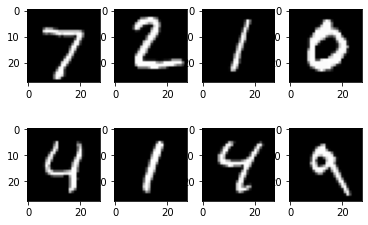

In [ ]:
from torchvision.transforms.transforms import ToTensor
import torch 
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_ds= torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_ds= torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_dl = torch.utils.data.DataLoader(dataset=train_ds, batch_size=128, shuffle=True)
test_dl = torch.utils.data.DataLoader(dataset=test_ds, batch_size=128, shuffle=False)

examples = iter(test_dl)
example_images, example_targets = examples.next()

# for i in range(8):
#   plt.subplot(2,4,i+1)
#   plt.imshow(example_images[i][0], cmap='gray')
# plt.show()

class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 100)
    self.fc2 = nn.Linear(100, 100)
    self.fc3 = nn.Linear(100, 10)
    self.dropout = nn.Dropout(0.2)

  



